In [ ]:
# --- Support Vector Machines Tutorial ---
# Welcome to your third machine learning class.
# Today, we'll learn about Support Vector Machines (SVM), a powerful classification algorithm.
# You’ve already learned about Linear and Logistic Regression, so we’ll build on that knowledge.

# Let's start by importing the necessary libraries:
import numpy as np   # For working with arrays and numerical computations
import matplotlib.pyplot as plt  # For plotting
from sklearn import datasets  # To import some example datasets
from sklearn.model_selection import train_test_split  # To split data into training and testing sets
from sklearn.preprocessing import StandardScaler  # For feature scaling (important for SVM)
from sklearn.svm import SVC  # The SVM classifier we're going to use
from sklearn.metrics import accuracy_score, confusion_matrix  # For evaluating our model

In [ ]:
# -- Step 1: Loading a Dataset --
# We will use a simple dataset provided by scikit-learn. The dataset is about iris flowers,
# where we classify different species of flowers based on the size of their petals and sepals.
iris = datasets.load_iris()

# Let's look at the data we have:
print("Feature Names:", iris.feature_names)  # Features are the inputs
print("Target Names:", iris.target_names)    # Targets are the outputs or classes (the species)


Feature Names: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
Target Names: ['setosa' 'versicolor' 'virginica']


In [ ]:
# The data (features) and labels (target values) are in separate arrays
X = iris.data  # Features
y = iris.target  # Target classes (0, 1, or 2, representing the species)


In [ ]:
# -- Step 2: Splitting Data into Training and Testing Sets --
# We need to split our data into two sets: training and testing.
# We'll train the SVM on one part and test it on another to see how well it generalizes.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# We use 'train_test_split' to randomly split 30% of the data for testing and 70% for training.
# Setting 'random_state' ensures we get the same results every time.


In [ ]:
# -- Step 3: Feature Scaling --
# SVMs are sensitive to the scale of the features. We need to standardize the features
# (make sure they have mean 0 and standard deviation 1) before using them in the model.
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit the scaler on training data and transform it
X_test_scaled = scaler.transform(X_test)  # Only transform the test data based on the training data scaling


In [ ]:
# -- Step 4: Building the SVM Model --
# We'll use scikit-learn's SVC (Support Vector Classifier) class to create an SVM.
# Let's start with a linear SVM (similar to linear regression but more powerful for classification).

svm_model = SVC(kernel='linear')  # 'kernel="linear"' tells SVM to use a linear classifier
svm_model.fit(X_train_scaled, y_train)  # Train the model using the scaled training data

SVC(kernel='linear')

In [ ]:
# -- Step 5: Making Predictions and Evaluating the Model --
# Now that the model is trained, we can use it to predict the test data.
y_pred = svm_model.predict(X_test_scaled)

# Let's evaluate how well the model did by looking at the accuracy and confusion matrix.
accuracy = accuracy_score(y_test, y_pred)  # How many predictions were correct?
print(f"Accuracy: {accuracy * 100:.2f}%")

# The confusion matrix shows where the model made correct/incorrect predictions.
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Accuracy: 97.78%
Confusion Matrix:
 [[19  0  0]
 [ 0 12  1]
 [ 0  0 13]]


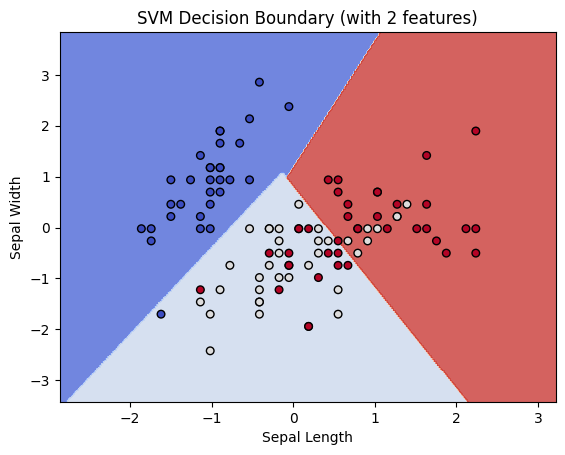

In [ ]:
# -- Step 6: Visualizing the Decision Boundary (for 2 features) --
# It's easier to visualize SVMs in 2 dimensions. Let's plot the decision boundary using two features (sepal length and sepal width).
# We’ll retrain the model with only two features to make the plot.

X_train_2d = X_train_scaled[:, :2]  # Select the first two features
X_test_2d = X_test_scaled[:, :2]  # Do the same for the test set

svm_model_2d = SVC(kernel='linear')
svm_model_2d.fit(X_train_2d, y_train)  # Train with the 2D data

# Function to plot the decision boundary
def plot_decision_boundary(X, y, model):
    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict the function value for the whole grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary and margins
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=30, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title("SVM Decision Boundary (with 2 features)")
    plt.xlabel('Sepal Length')
    plt.ylabel('Sepal Width')
    plt.show()

# Let's visualize the decision boundary for the training set
plot_decision_boundary(X_train_2d, y_train, svm_model_2d)

In [ ]:
# --- Follow-Up: Non-Linear SVM Kernels ---

# Non-linear kernels allow us to classify data that isn't linearly separable by projecting it into higher dimensions.

# -- Step 6: RBF Kernel SVM Model --
# The RBF (Radial Basis Function) kernel is one of the most popular non-linear kernels.
rbf_svm = SVC(kernel='rbf', gamma='scale')  # Default 'gamma' is 'scale', meaning it's set automatically
rbf_svm.fit(X_train_scaled, y_train)

# -- Step 7: Making Predictions and Evaluating the RBF Kernel SVM Model --
y_pred_rbf = rbf_svm.predict(X_test_scaled)
accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"RBF Kernel SVM Accuracy: {accuracy_rbf * 100:.2f}%")
cm_rbf = confusion_matrix(y_test, y_pred_rbf)
print("RBF Kernel SVM Confusion Matrix:\n", cm_rbf)

# -- Step 8: Polynomial Kernel SVM Model --
# The Polynomial kernel allows us to model polynomial relationships between the features.
poly_svm = SVC(kernel='poly', degree=3)  # degree=3 means cubic polynomial kernel
poly_svm.fit(X_train_scaled, y_train)

# -- Step 9: Making Predictions and Evaluating the Polynomial Kernel SVM Model --
y_pred_poly = poly_svm.predict(X_test_scaled)
accuracy_poly = accuracy_score(y_test, y_pred_poly)
print(f"Polynomial Kernel SVM Accuracy: {accuracy_poly * 100:.2f}%")
cm_poly = confusion_matrix(y_test, y_pred_poly)
print("Polynomial Kernel SVM Confusion Matrix:\n", cm_poly)

# -- Step 10: Sigmoid Kernel SVM Model --
# The Sigmoid kernel mimics a neural network activation function and can be used for some classification tasks.
sigmoid_svm = SVC(kernel='sigmoid')
sigmoid_svm.fit(X_train_scaled, y_train)

# -- Step 11: Making Predictions and Evaluating the Sigmoid Kernel SVM Model --
y_pred_sigmoid = sigmoid_svm.predict(X_test_scaled)
accuracy_sigmoid = accuracy_score(y_test, y_pred_sigmoid)
print(f"Sigmoid Kernel SVM Accuracy: {accuracy_sigmoid * 100:.2f}%")
cm_sigmoid = confusion_matrix(y_test, y_pred_sigmoid)
print("Sigmoid Kernel SVM Confusion Matrix:\n", cm_sigmoid)



RBF Kernel SVM Accuracy: 100.00%
RBF Kernel SVM Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Polynomial Kernel SVM Accuracy: 95.56%
Polynomial Kernel SVM Confusion Matrix:
 [[19  0  0]
 [ 0 13  0]
 [ 0  2 11]]
Sigmoid Kernel SVM Accuracy: 88.89%
Sigmoid Kernel SVM Confusion Matrix:
 [[19  0  0]
 [ 0  9  4]
 [ 0  1 12]]


# --- Summary and Tips ---
In this follow-up, we introduced non-linear kernels:
- **RBF Kernel**: A flexible and widely used kernel for non-linear problems.
- **Polynomial Kernel**: Useful when you expect a polynomial relationship between features.
- **Sigmoid Kernel**: Mimics the behavior of neural networks, useful in certain cases.

**Key Tip:** Use RBF as a default kernel when you're unsure about the data's structure. You can use grid search to fine-tune parameters like 'C' and 'gamma' for the best results.